In [7]:
import tensorflow as tf
import numpy as np
import cv2 
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
model = tf.keras.models.load_model("Model/2") #Load Model

In [4]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                 

In [27]:
class_labels = {
    0 : "Potato Early Blight",
    1 : "Potato Late Blight",
    2 : "Healthy" 
}

In [35]:
def acquireimages(filepath):
   test_data = pathlib.Path(filepath)
   predicting_images_paths = list(test_data.glob('*'))
   predicting_images= []
   for i in predicting_images_paths:
      image = cv2.imread(str(i))
      print(image)
      predicting_images.append(image)
   return predicting_images
   


In [36]:
def plotimages(images,len):
    fig = plt.figure(figsize=(10,7))
    rows, column = 3,3
    
    for i in range(len):
       
       fig.add_subplot(rows, column, i+1)  
       plt.imshow(images[i]) 
       plt.axis('off') 
       plt.title("Image :" + str(i) )

In [37]:
X = acquireimages('test_images')

[[[186 208 160]
  [189 214 164]
  [192 218 165]
  ...
  [ 24  75  38]
  [ 46  98  61]
  [ 64 116  79]]

 [[156 186 137]
  [154 187 136]
  [149 183 129]
  ...
  [ 45  97  60]
  [ 72 124  87]
  [ 81 133  96]]

 [[117 165 113]
  [114 164 110]
  [107 158 101]
  ...
  [ 77 129  92]
  [103 155 118]
  [ 95 149 112]]

 ...

 [[191 180 200]
  [191 180 200]
  [191 180 200]
  ...
  [128 166 224]
  [128 166 224]
  [127 165 223]]

 [[191 180 200]
  [191 180 200]
  [191 180 200]
  ...
  [127 165 223]
  [127 165 223]
  [127 165 223]]

 [[191 180 200]
  [191 180 200]
  [191 180 200]
  ...
  [126 164 222]
  [126 164 222]
  [126 164 222]]]
[[[  5 204 113]
  [  4 205 114]
  [  5 205 117]
  ...
  [ 13  23  23]
  [ 13  22  25]
  [ 14  23  26]]

 [[  2 201 110]
  [  2 203 112]
  [  3 203 115]
  ...
  [ 12  22  22]
  [ 13  22  25]
  [ 13  22  25]]

 [[  0 198 110]
  [  0 199 111]
  [  2 202 114]
  ...
  [ 11  20  23]
  [ 11  20  23]
  [ 12  21  24]]

 ...

 [[124 122 152]
  [121 119 149]
  [117 114 146]
  ..

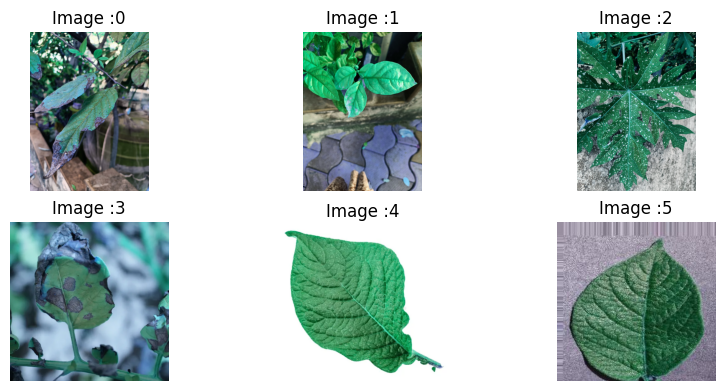

In [38]:
plotimages(X,len(X))

In [39]:
def predict_image(image_number):
    image = X[image_number]
    resizing = np.array(cv2.resize(image,(256,256)))
    expanding = np.expand_dims(resizing,0)
    label = np.argmax(model.predict(expanding))
    return class_labels[label]


In [41]:
image = predict_image(5)
image

1/1 [==============================] - 0s 28ms/step


'Healthy'

Dataset Labels
    "Potato Early Blight" : 0,
    "Potato Late Blight" : 1,
    "Healthy" : 2